NameError: name 'title' is not defined

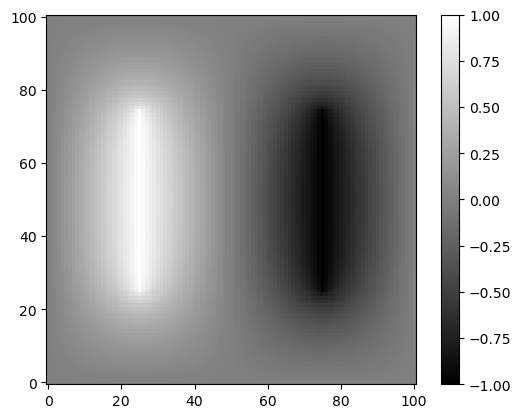

In [6]:
from numpy import empty, zeros, max, copy
from pylab import imshow, gray, show, colorbar

# Constants
M = 100         # Grid squares on a side
V_plate = 1.0   # Voltage of the plates
V_wall = 0.0    # Voltage of the walls
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1, M+1], float)
phi[:, 0] = V_wall
phi[:, -1] = V_wall
phi[25:75, 25] = V_plate
phi[25:75, 75] = -V_plate
phinew = copy(phi)

# Main loop
delta = 1.0
while delta > target:
    # Calculate new values of the potential
    for i in range(1, M):
        for j in range(1, M):
            if 25 <= i <= 74 and (j == 25 or j == 75):
                continue  # Skip the plates
            phinew[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
    # Calculate maximum difference from old values
    delta = max(abs(phi - phinew))
    # Swap the two arrays around
    phi, phinew = phinew, phi

# Make a plot
imshow(phi, origin='lower')
gray()
colorbar()  # Add color bar to the right
title('Electronic Capacitor Simulation')  # Add title
show()